# Transitioning to other Program Execution Models

Jupyter notebooks are great as a learning environment and even as a development environment *if it works for you*. But it has a number of disadvantages which were probably covered already, but here are a few:
 - The state is not well-defined:  you can execute cells multiple times or out of order and that can lead to strange bugs;
 - It's generally more difficult to setup a jupyter notebook on a remote host;
 - Interactive plots and widgets are not straight-forward
 - It's *very* difficult (maybe impossible) to submit a jupyter notebook to an HPC cluster or cloud computing service (though check out the [Google Collaboratory](https://colab.research.google.com).
 
There are several alternative ways to run your python code. These include:

 - Executing from the command-line
 - Executing from within `ipython`
 - Executing from within an IDE (Integrated Development Environment)
 
In this notebook, we will cover the command-line model.
 
## The Command Line

You've seen in the Unix tutorial how to run commands from the terminal. Most of these commands are written in C/C++. There are likely some written in a scripting language called `perl` and in Linux operating systems, some are even written in `python`. But you'd never know it, as they all behave just like regular Unix commands. So let's see how we'd take a jupyter notebook and make it into a command-line program.

### Converting a Notebook to python script

A python script is just a plain ASCII file with python statements in it. You could copy-paste a jupyter notebook's execution cells and paste them into a file and that would give you a python script. Or, let jupyter do it for you:  select `File -> Download as -> Python (.py)` from the menu above and jupyter will not only export the execution cells, it will include all the Markdown cells as comments. That gets you 99% of the way there! Try it now with this notebook and it will download a file named `JupyterToCommandLine.py` (probably in your `Downloads` folder). Open `JupyterToCommandLine.py` with a text editor (e.g., `TextEdit.app` on a Mac, or `Notebook` on Windows) and have a look. You can now run this from the command line by running this in a terminal:

    $ python ~/Downloads/JupyterToCommandLine.py

It will certainly do *something*, maybe even everything your original notebook did, but likely you'll need to do some cleanup work. The rest of this notebook covers this cleanup.

### Shebang!

You may have noticed these odd lines at the top of the script that was created:

    #!/usr/bin/env python
    # coding: utf-8

The first line is called a *shebang* and starts with `#!`. That signals to the operating system that this script should be run with `python`. If you make your script executable:

    $ chmod +x ~/Downloads/JupyterToCommandLine.py 
    
Then you can execute the script without having to call the `python` executable explicitly:

    $ ~/Downloads/JupyterToCommandLine.py
    
Better yet, if you move the script to a folder in your `$PATH`, you can just run the command all by itself:

    $ JupyterToCommandLine.py

## Command-line arguments

In a notebook, you setup everything in the execution cells. You can then change parameters and such by modifying these cells and then re-running the notebook. Something like the following:

In [1]:
N = 50
verbose = True
outputfile = 'MyPlot.png'
print(N, verbose, outputfile)

50 True SomeFile.dat


If you run the downloaded script version of this notebook, you will see the output above. Now, if you wanted to change these input parameters, you could modify the script and re-run it. But another option is to use *command line arguments* like other `UNIX` commands. Here's how:  import the `sys` module. Any arguments on the command-line will be available as a list called `sys.argv`:

In [3]:
import sys
Nargs = len(sys.argv)
print('This script was run with {} arguments'.format(Nargs))
print('Here they are:')
print(sys.argv)

This script was run with 3 arguments
Here they are:
['/Users/cburns/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py', '-f', '/Users/cburns/Library/Jupyter/runtime/kernel-cee4b442-46cd-4a74-a8d9-dba11391d434.json']


The first element of `sys.argv` is always the name of the executable running the script. If you ran the above command in a jupyter notebook, it will be some long path in your `anaconda` folder followed by `ipykernel_launcher.py`. The rest of the elements are arguments sent to `ipykernel_launcher.py` to help it run. Try running the downloaded version of the script with different command-line arguments and you'll see the above message is modified.

### argparse

Now that you can access the command-line arguments from within your script, you now have to figure out how you are going to organize them. With only a few, it's not too bad; you just have to remember how many and which one is first, second, etc. But as you write more complicated scripts, programs, or even applications, it can get complicated. Luckily, there's a built-in module specifically for dealing with *parsing* command-line arguments. 

A detailed look at `argparse` is beyond the scope of this notebook, so if you want to use it, have a look at the [documentation](https://docs.python.org/3/library/argparse.html). But here's an example of how it works to get an idea:

In [8]:
import argparse
parser = argparse.ArgumentParser(description="A helpful description of the script")
parser.add_argument("-N", default=50, type=int, help="An integer argument")
parser.add_argument("-outputfile", default="MyPlot.pnt", help="Name of output graph")
parser.add_argument("-v", action="store_true", help="Be extra versbose")
args,extra = parser.parse_known_args()

print("argparse found the following arguments:")
print(args)

Namespace(N=50, outputfile='MyPlot.pnt', v=False)


You can now run the downloaded script and specify these arguments and see the `args` namespace change. For example, you could try:

    $ JupyterToCommandLine -oututfile Somethingelse.pdf -N 5
    
Better yet, you can specify `-h` to get a help message describing the program and arguments. It will also convert to the correct type you specify.

## Fixing Plots

One great thing about notebooks is that you an embed plots into the document. There's no equivalent to this on the command line. The easiest thing to do is simply output the graph to a file.

Text(0, 0.5, 'Y')

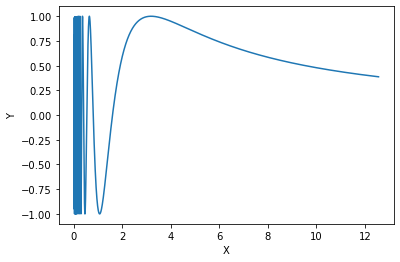

In [16]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0.01, 4*np.pi, 10000)
y = np.sin(5./x)
plt.plot(x,y, '-')
plt.xlabel("X")
plt.ylabel("Y")

When you run `JupyterToCommandLine.py` on the command-line, it will work fine. But there won't be any plot. What you need to do is `save` the plot to a file. Simply add the following line in your script, after all the plot commands:

    plt.savefig(args.outputfile)
    
Note that here, I used the `outputfile` argument as the output file, and it will use the default (`MyPlot.png`) unless you override it with the command-line arguments, like:

    $ python ~/Downloads/JupyterToCommandLine.py -outputfile AnotherGraph.png
    
### Interactive Plots

Something which is hard to do in notebooks, but relatively easy to do with the command-line is launch an interactive plot. Here, after you've setup your graph the way to you want to present it,  you then run `plt.show()`. This will launch a pop-pup window with your graph. It will also have buttons that allow the user to pan/zoom, modify the margins, and save the plot to a file. Try changing the `plt.savefig()` command to a `plt.show()` instead and-rerun the script from the command-line. Now you can zoom in on the left-hand part of the plot.

Your script will stop executing at `plt.show()` (technically called *blocking* the execution). It will stay blocked until you close the plot window, at which point your script will continue. You *can* write functions that are executed with key presses or mouse clicks, creating custom interactions. See the [interactive plotting](./plotting_interactive.ipynb) notebook for examples of this. Note that you don't need those extra modules (`ipympl` and `ipywidgets`) to make it work.
